In [27]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
kdf = pd.read_csv('tracks.csv')

In [3]:
# List of file paths
file_paths = [
    'mpd.slice.16000-16999.json',
    'mpd.slice.27000-27999.json',
    'mpd.slice.31000-31999.json',
    'mpd.slice.7000-7999.json',
    'mpd.slice.60000-60999.json',
    'mpd.slice.998000-998999.json',
    'mpd.slice.86000-86999.json'
]

# Initialize an empty list to store all data
all_data = []

# Iterate through each file
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Iterate through each playlist
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '')  # Use .get() to handle missing descriptions
            # Iterate through each track in the playlist
            for track in playlist['tracks']:
                # Remove the "spotify:track:" prefix from the track_uri
                track_id = track['track_uri'].replace("spotify:track:", "")
                # Append the track data to the all_data list
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,  # Use the cleaned track ID
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })

# Convert the list of dictionaries into a DataFrame
xdf = pd.DataFrame(all_data)

# Display the DataFrame
print(xdf.head())

  playlist_name playlist_desc  position_in_playlist  \
0  january 2017                                   0   
1  january 2017                                   1   
2  january 2017                                   2   
3  january 2017                                   3   
4  january 2017                                   4   

                            track_name                      id  \
0       Don't Stop Me Now - Remastered  5T8EDUDqKcs6OSOwEsfqG7   
1            One More Try - Remastered  5932kbyNt445gDTT2chRUS   
2  Trippin' On A Hole In A Paper Heart  2gdtLnVGGg80Kj9GiqP0vH   
3                    Drunk Text anthem  4OaubMrcSy9kVKIx79Qku8   
4                 Nutshell - Unplugged  2i3NbLo6hKKasQXAb2qBGG   

           artist_name  duration_ms  \
0                Queen       209413   
1       George Michael       350666   
2  Stone Temple Pilots       175920   
3         Magneto Dayo       208112   
4      Alice In Chains       272360   

                                     

In [4]:
kdf.dropna

<bound method DataFrame.dropna of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903    

In [5]:
xdf.dropna

<bound method DataFrame.dropna of        playlist_name                 playlist_desc  position_in_playlist  \
0       january 2017                                                   0   
1       january 2017                                                   1   
2       january 2017                                                   2   
3       january 2017                                                   3   
4       january 2017                                                   4   
...              ...                           ...                   ...   
464253         <3333  biebs taylor 1d miley n such                   200   
464254         <3333  biebs taylor 1d miley n such                   201   
464255         <3333  biebs taylor 1d miley n such                   202   
464256         <3333  biebs taylor 1d miley n such                   203   
464257         <3333  biebs taylor 1d miley n such                   204   

                                 track_name          

In [6]:
dmz = pd.merge(xdf, kdf, on = 'id', how = 'left')

In [7]:
dmz.dropna()

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,january 2017,,0,Don't Stop Me Now - Remastered,5T8EDUDqKcs6OSOwEsfqG7,Queen,209413,Jazz,Don't Stop Me Now - Remastered 2011,82.0,...,5.0,-5.276,1.0,0.1700,0.047500,0.000176,0.7760,0.6090,156.295,4.0
1,january 2017,,1,One More Try - Remastered,5932kbyNt445gDTT2chRUS,George Michael,350666,Faith,One More Try - Remastered,60.0,...,5.0,-12.544,1.0,0.0283,0.434000,0.000038,0.1100,0.0823,119.005,3.0
2,january 2017,,2,Trippin' On A Hole In A Paper Heart,2gdtLnVGGg80Kj9GiqP0vH,Stone Temple Pilots,175920,Tiny Music...Songs From The Vatican Gift Shop,Trippin' on a Hole in a Paper Heart,58.0,...,7.0,-3.857,1.0,0.0632,0.000386,0.001610,0.1570,0.4460,106.479,4.0
4,january 2017,,4,Nutshell - Unplugged,2i3NbLo6hKKasQXAb2qBGG,Alice In Chains,272360,The Essential Alice In Chains,Nutshell - Unplugged,32.0,...,3.0,-11.069,0.0,0.0311,0.224000,0.113000,0.9760,0.2370,122.417,3.0
5,january 2017,,5,Paranoid,0w2piYWj1F2bzUftzGJgK9,Kanye West,277906,808s & Heartbreak,Paranoid,63.0,...,6.0,-7.408,1.0,0.1060,0.114000,0.000098,0.0765,0.4640,114.991,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464245,<3333,biebs taylor 1d miley n such,192,You'll Always Find Your Way Back Home,12wSL3tGk3MtbDEhfG7xy3,Hannah Montana,224186,Hannah Montana The Movie,You'll Always Find Your Way Back Home,66.0,...,8.0,-3.673,1.0,0.0583,0.030400,0.000000,0.1890,0.6920,152.946,4.0
464247,<3333,biebs taylor 1d miley n such,194,"The Best of Both Worlds - From ""Hannah Montana...",6Z0F3Mqj7tq1CBZo5qMlUg,Hannah Montana,174120,Hannah Montana,"The Best of Both Worlds - From ""Hannah Montana...",64.0,...,1.0,-3.645,1.0,0.0501,0.051200,0.000000,0.0613,0.6810,124.031,3.0
464250,<3333,biebs taylor 1d miley n such,197,Classic,6FE2iI43OZnszFLuLtvvmg,MKTO,175426,MKTO,Classic,82.0,...,1.0,-4.689,1.0,0.1240,0.038400,0.000000,0.1570,0.7560,102.071,4.0
464251,<3333,biebs taylor 1d miley n such,198,American Dream,3JMAdPq5TUOKBGsTATjLEH,MKTO,225746,MKTO,American Dream,62.0,...,0.0,-5.043,1.0,0.0497,0.114000,0.000000,0.2310,0.4970,122.846,4.0


In [8]:
dmz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464258 entries, 0 to 464257
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   playlist_name         464258 non-null  object 
 1   playlist_desc         464258 non-null  object 
 2   position_in_playlist  464258 non-null  int64  
 3   track_name            464258 non-null  object 
 4   id                    464258 non-null  object 
 5   artist_name           464258 non-null  object 
 6   duration_ms_x         464258 non-null  int64  
 7   album_name            464258 non-null  object 
 8   name                  193087 non-null  object 
 9   popularity            193087 non-null  float64
 10  duration_ms_y         193087 non-null  float64
 11  explicit              193087 non-null  float64
 12  artists               193087 non-null  object 
 13  id_artists            193087 non-null  object 
 14  release_date          193087 non-null  object 
 15  

In [9]:
dmzX = dmz.dropna(how = 'all')

In [10]:
dmzX['synthness'] = (1 - dmzX['acousticness']) * dmzX['instrumentalness'] * dmzX['energy']

In [11]:
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']

In [12]:
X= dmzX[features].copy()

In [13]:
scaler=StandardScaler()

In [14]:
X_scaled=scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0,X], X[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()

In [20]:
# Check for NaN values
if np.isnan(X_scaled).any():
    print("There are NaN values in X_scaled.")

# Check for infinite values
if np.isinf(X_scaled).any():
    print("There are infinite values in X_scaled.")

There are NaN values in X_scaled.


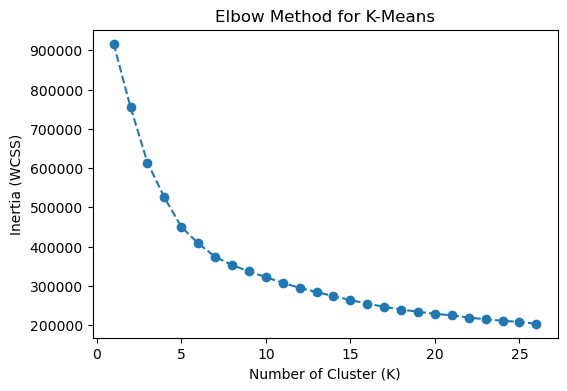

In [22]:
k_values = range(1, 27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_clean)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()

In [28]:
k_values = range(2, 27)  # Silhouette score is not defined for k=1
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_clean)
    
    # Predict cluster labels for the data
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(X_scaled_clean, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

KeyboardInterrupt: 

In [23]:
print(np.isnan(X_scaled).sum())
X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]
imputer = SimpleImputer(strategy="mean")
X_scaled = imputer.fit_transform(X_scaled)

1084684


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  